## Analisis exploratorio de los datos

In [3]:
from sqlalchemy import create_engine

# Parámetros de la conexión
server = 'localhost\\SQLEXPRESS'  # Reemplaza con el nombre de tu servidor
database = 'Ecommerce_Brasil'  # Reemplaza con el nombre de tu base de datos

# Crear la cadena de conexión utilizando la autenticación de Windows
connection_string = f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

# Crear el motor de conexión
engine = create_engine(connection_string)

In [4]:
# Prueba de conexión
try:
    with engine.connect() as connection:
        print("Conexión exitosa a la base de datos.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")

Conexión exitosa a la base de datos.



--- Orders ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 5.9+ MB
None
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
or

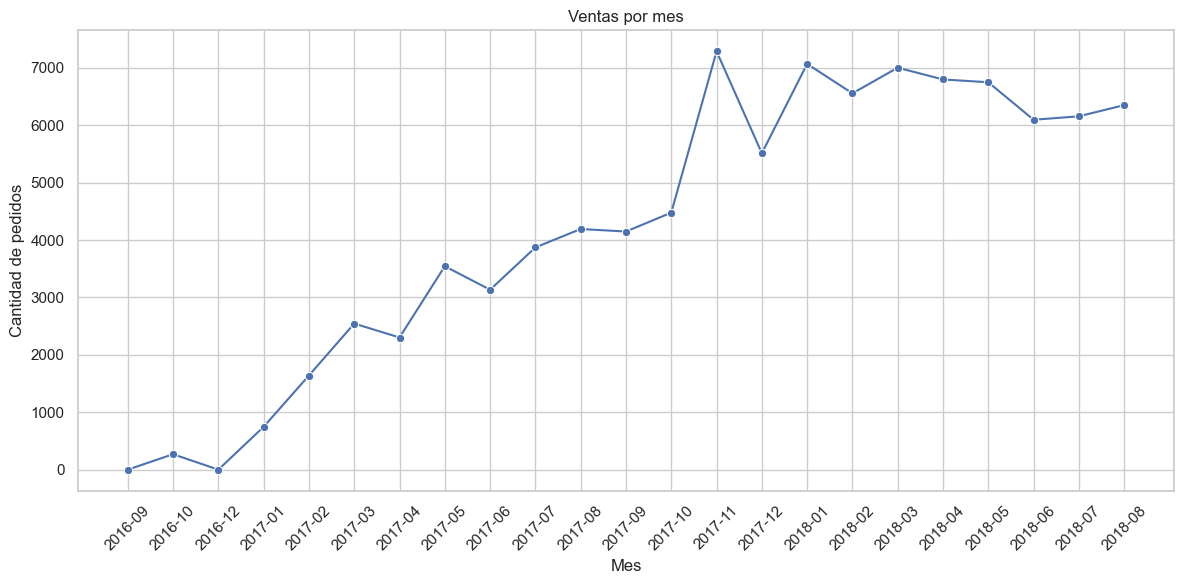

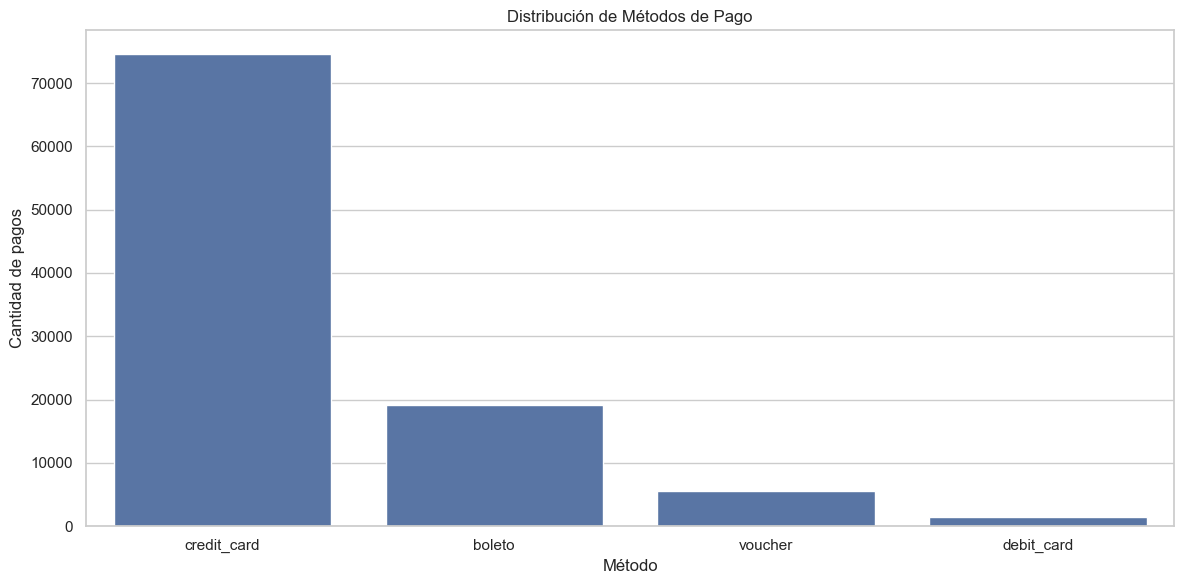

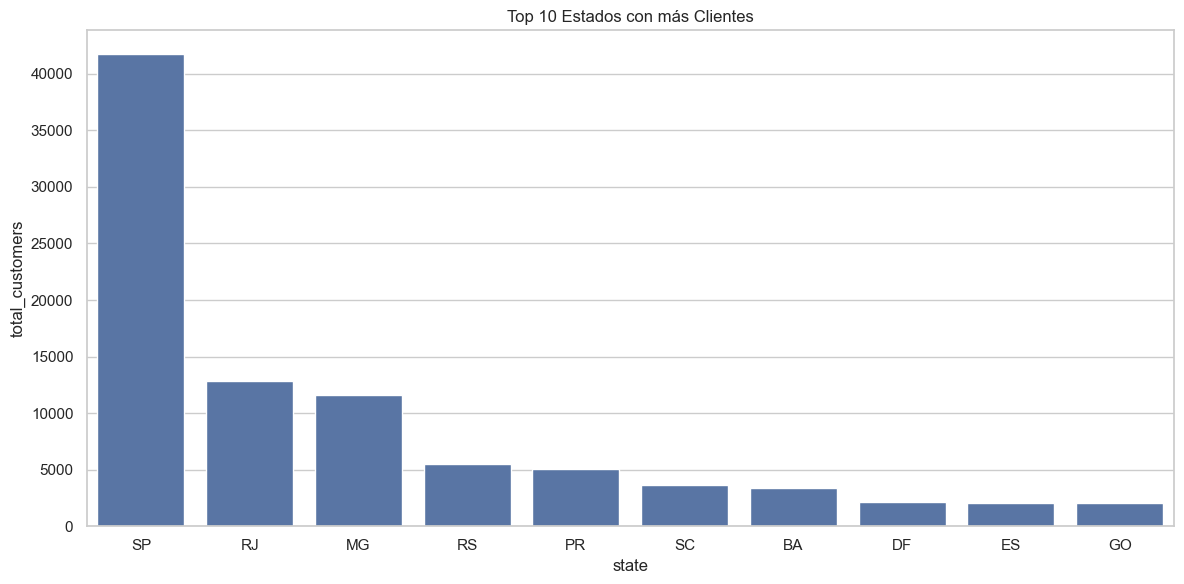

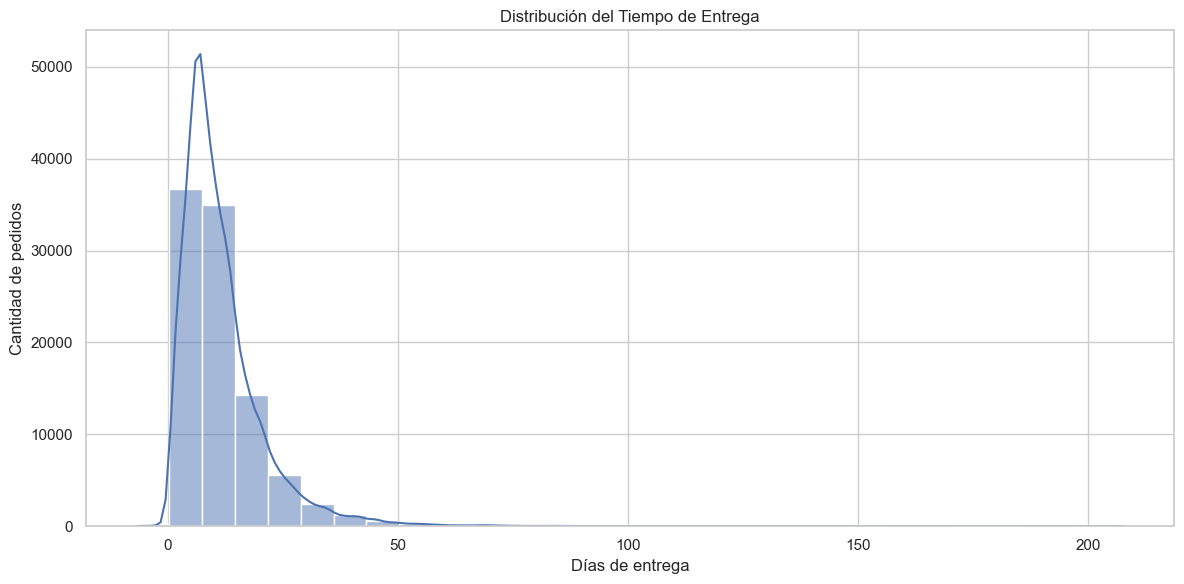

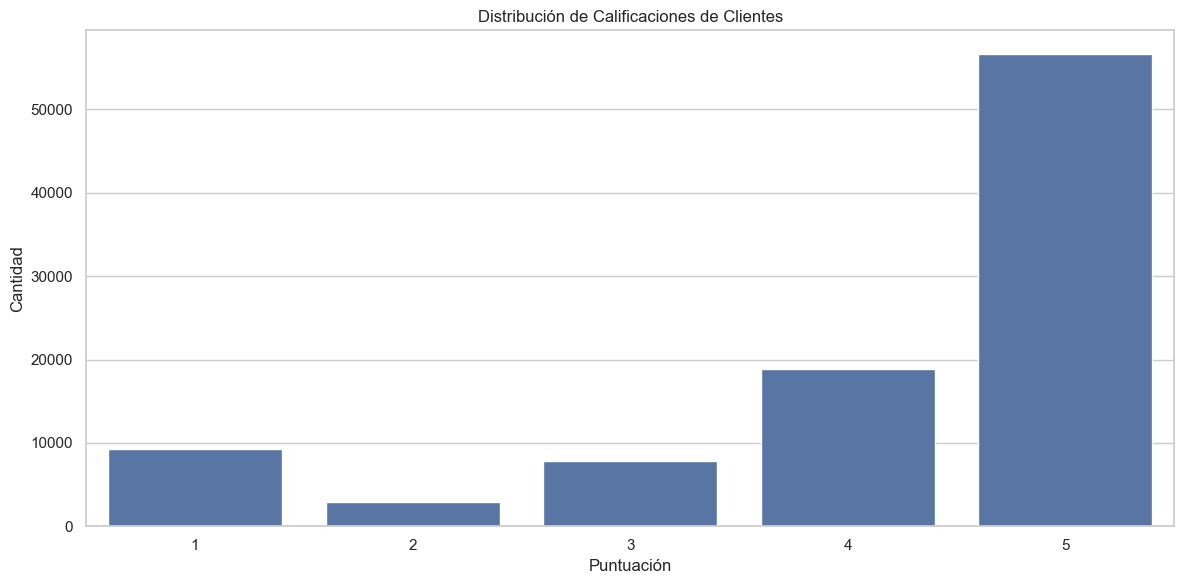

In [5]:
# Exploratory Data Analysis - E-commerce Brasil (Olist Dataset)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de visualizaciones
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# -----------------------------
# 1. CARGA DE DATOS PRINCIPALES
# -----------------------------
df_orders = pd.read_sql("SELECT * FROM Orders", engine)
df_customers = pd.read_sql("SELECT * FROM Customers", engine)
df_items = pd.read_sql("SELECT * FROM Items", engine)
df_payments = pd.read_sql("SELECT * FROM Payments", engine)
df_reviews = pd.read_sql("SELECT * FROM Reviews", engine)

# -----------------------------
# 2. ANÁLISIS GENERAL DE CADA TABLA
# -----------------------------
print("\n--- Orders ---")
print(df_orders.info())
print(df_orders.isnull().sum())

print("\n--- Customers ---")
print(df_customers.info())

print("\n--- Payments ---")
print(df_payments.payment_type.value_counts())

print("\n--- Reviews ---")
print(df_reviews.review_score.value_counts())

# -----------------------------
# 3. TENDENCIA DE VENTAS
# -----------------------------
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['purchase_month'] = df_orders['order_purchase_timestamp'].dt.to_period("M")

monthly_sales = df_orders.groupby('purchase_month')['order_id'].count().reset_index()
monthly_sales['purchase_month'] = monthly_sales['purchase_month'].astype(str)

sns.lineplot(data=monthly_sales, x='purchase_month', y='order_id', marker='o')
plt.title("Ventas por mes")
plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Cantidad de pedidos")
plt.tight_layout()
plt.show()

# -----------------------------
# 4. MÉTODOS DE PAGO
# -----------------------------
sns.countplot(data=df_payments, x='payment_type', order=df_payments['payment_type'].value_counts().index)
plt.title("Distribución de Métodos de Pago")
plt.ylabel("Cantidad de pagos")
plt.xlabel("Método")
plt.tight_layout()
plt.show()

# -----------------------------
# 5. ESTADOS CON MÁS CLIENTES
# -----------------------------
clients_by_state = df_customers['customer_state'].value_counts().reset_index()
clients_by_state.columns = ['state', 'total_customers']
sns.barplot(data=clients_by_state.head(10), x='state', y='total_customers')
plt.title("Top 10 Estados con más Clientes")
plt.tight_layout()
plt.show()

# -----------------------------
# 6. TIEMPO DE ENTREGA
# -----------------------------
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['delivery_time'] = (df_orders['order_delivered_customer_date'] - df_orders['order_approved_at']).dt.days

sns.histplot(df_orders['delivery_time'].dropna(), bins=30, kde=True)
plt.title("Distribución del Tiempo de Entrega")
plt.xlabel("Días de entrega")
plt.ylabel("Cantidad de pedidos")
plt.tight_layout()
plt.show()

# -----------------------------
# 7. REVIEW SCORES
# -----------------------------
sns.countplot(data=df_reviews, x='review_score', order=sorted(df_reviews['review_score'].unique()))
plt.title("Distribución de Calificaciones de Clientes")
plt.xlabel("Puntuación")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()
